# Azure Cloud Cost Analysis

## Introduction
The Azure Cloud Cost Analysis is dedicated to analyzing monthly costs associated with various Azure services from May 2023 to April 2024.

In [16]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#load data
df = pd.read_csv('cost-analysis.csv')

In [3]:
df.head()

,UsageDate,ServiceName,CostUSD,Cost,Currency
0,2023-05-01,Automation,0.001000,0.081771,INR
1,2023-05-01,Azure DNS,0.500348,40.914076,INR
2,2023-05-01,Bandwidth,127.770719,10447.971394,INR
3,2023-05-01,Storage,134.504502,10998.601241,INR
4,2023-05-01,Virtual Machines,13.987309,1143.759767,INR


In [4]:
df.dtypes

UsageDate       object
ServiceName     object
CostUSD        float64
Cost           float64
Currency        object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UsageDate    89 non-null     object 
 1   ServiceName  89 non-null     object 
 2   CostUSD      89 non-null     float64
 3   Cost         89 non-null     float64
 4   Currency     89 non-null     object 
dtypes: float64(2), object(3)
memory usage: 3.6+ KB


In [6]:
df.shape

(89, 5)

In [7]:
df.isnull().sum()

UsageDate      0
ServiceName    0
CostUSD        0
Cost           0
Currency       0
dtype: int64

In [8]:
df.tail()

,UsageDate,ServiceName,CostUSD,Cost,Currency
84,2024-04-01,Logic Apps,0.003708,0.308808,INR
85,2024-04-01,Storage,152.335920,12688.249184,INR
86,2024-04-01,Virtual Machines,22.328693,1859.784719,INR
87,2024-04-01,Virtual Machines Licenses,27.547339,2294.452273,INR
88,2024-04-01,Virtual Network,26.599421,2215.498999,INR


In [9]:
df.describe()

,CostUSD,Cost
count,89.000000,89.000000
mean,47.157293,3905.133202
std,56.253490,4658.406713
min,0.000000,0.000000
25%,0.484221,40.309546
50%,23.789508,1952.895445
75%,123.555142,10138.471661
max,154.816673,12887.907485


In [10]:
df['UsageDate'] = pd.to_datetime(df['UsageDate'])

In [11]:
df.dtypes

UsageDate      datetime64[ns]
ServiceName            object
CostUSD               float64
Cost                  float64
Currency               object
dtype: object

In [12]:
df['Month'] = df['UsageDate'].dt.month

In [14]:
df.head()

,UsageDate,ServiceName,CostUSD,Cost,Currency,Month
0,2023-05-01,Automation,0.001000,0.081771,INR,5
1,2023-05-01,Azure DNS,0.500348,40.914076,INR,5
2,2023-05-01,Bandwidth,127.770719,10447.971394,INR,5
3,2023-05-01,Storage,134.504502,10998.601241,INR,5
4,2023-05-01,Virtual Machines,13.987309,1143.759767,INR,5


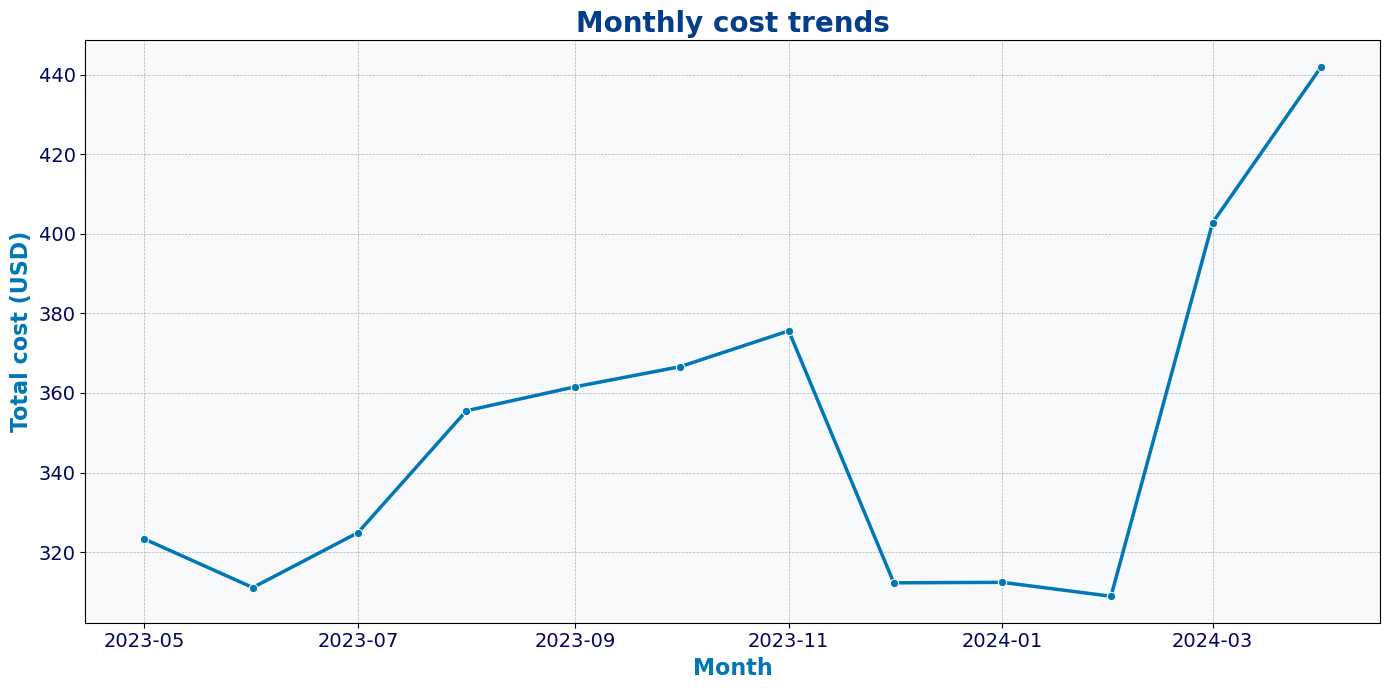

In [99]:
monthly_cost = df.groupby('UsageDate')['CostUSD'].sum()
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_cost, color='#0077b6', marker='o', linewidth=2.5)
plt.title('Monthly cost trends', fontsize=20, color='#023e8a', weight='bold')
plt.xlabel('Month', fontsize=16, color='#0077b6', weight='bold')
plt.ylabel('Total cost (USD)', fontsize=16, color='#0077b6', weight='bold')
plt.xticks(fontsize=14, color='#03045e')
plt.yticks(fontsize=14, color='#03045e')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('#f8f9fa')
plt.tight_layout()
plt.show()

- We discover from this plot that there are noticeable peaks and valleys that suggest periods of increased and decreased usage or cost.
- there is an increase in the total cost from May 2023 to April 2024 with a slight dip in December 2023, January 2024 and February 2024.
- Specific months exhibit significant spikes, which could indicate special projects, increased ressource allocation or inefficient cost management during those times.

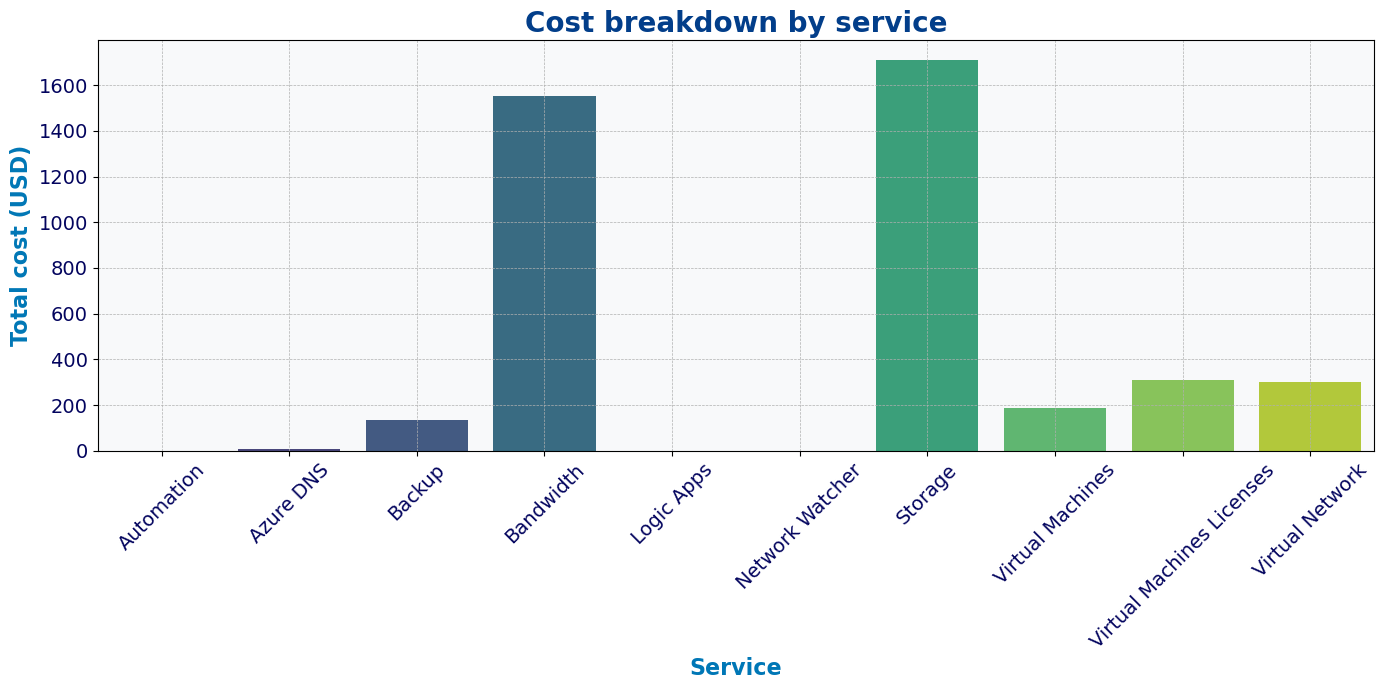

In [101]:
service_cost = df.groupby('ServiceName')['CostUSD'].sum().reset_index()
plt.figure(figsize=(14, 7))
sns.barplot(data=service_cost, x='ServiceName', y='CostUSD', palette='viridis')
plt.title('Cost breakdown by service', fontsize=20, color='#023e8a', weight='bold')
plt.xlabel('Service', fontsize=16, color='#0077b6', weight='bold')
plt.ylabel('Total cost (USD)', fontsize=16, color='#0077b6', weight='bold')
plt.xticks(fontsize=14, color='#03045e', rotation=45)
plt.yticks(fontsize=14, color='#03045e')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('#f8f9fa')
plt.tight_layout()
plt.show()

- We discover from this plot that BandWidth and Storage are the most expensive services, accounting for a significant portion of the total cost.
- Virtual Machines Licenses and Virtual Network are also contributors of the totalc ost but their cost are lower compared to BandWidth and Storage.
- Automation, Logic Apps, Network Watcher and Azure DNS have lower cost.
- For the service that has high cost, it may be worth in investigating usage patterns or seeking cost saving measures for that service.

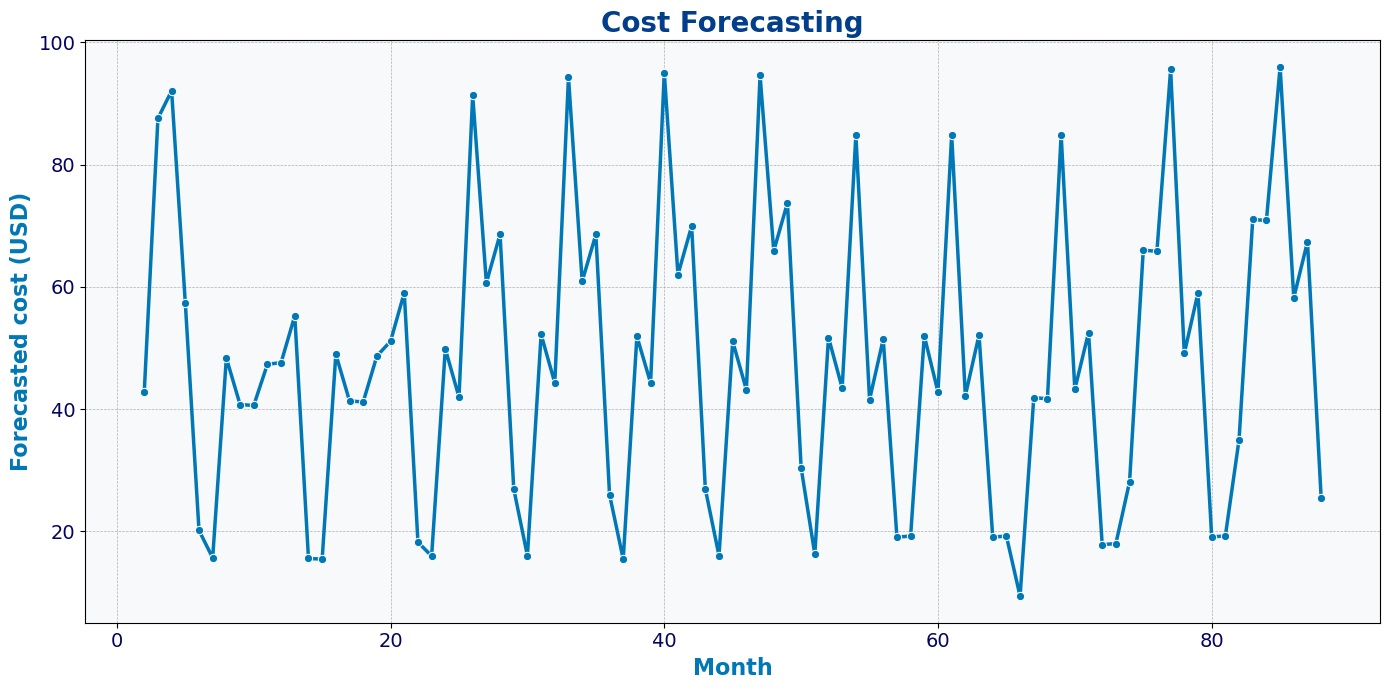

In [103]:
forecast = df['CostUSD'].rolling(window=3).mean()
plt.figure(figsize=(14, 7))
sns.lineplot(data=forecast, color='#0077b6', marker='o', linewidth=2.5)
plt.title('Cost Forecasting', fontsize=20, color='#023e8a', weight='bold')
plt.xlabel('Month', fontsize=16, color='#0077b6', weight='bold')
plt.ylabel('Forecasted cost (USD)', fontsize=16, color='#0077b6', weight='bold')
plt.xticks(fontsize=14, color='#03045e')
plt.yticks(fontsize=14, color='#03045e')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('#f8f9fa')
plt.tight_layout()
plt.show()

- We discover from this plot that there is an increase in azure costs based on the rolling average.
- This forecast helps in anticipating future expenses, suggesting a need for budget planning and cost management strategies.
- It can be used to preapre for future financial allocations.